# Data analysis: Velib

Author: O. Roustant, INSA Toulouse. January 2021.


We consider the ‘Vélib’ data set, related to the bike sharing system of Paris. The data are loading profiles of the bike stations over one week, collected every hour, from the period Monday 2nd Sept. - Sunday 7th Sept., 2014. The loading profile of a station, or simply loading, is defined as the ratio of number of available bikes divided by the number of bike docks. A loading of 1 means that the station is fully loaded, i.e. all bikes are available. A loading of 0 means that the station is empty, all bikes have been rent.

From the viewpoint of data analysis, the individuals are the stations. The variables are the 168 time steps (hours in the week). The aim is to detect clusters in the data, corresponding to common customer usages. This clustering should then be used to predict the loading profile.

In [1]:
rm(list = ls())   # erase everything, start from scratch!

# load the data from package funFEM

library(funFEM)
library(FactoMineR)
library(factoextra)
library(ggplot2)
data(velib)
# help("velib")

Loading required package: MASS

Loading required package: fda

Loading required package: splines

Loading required package: Matrix

Loading required package: fds

Loading required package: rainbow

Loading required package: pcaPP

Loading required package: RCurl


Attaching package: ‘fda’


The following object is masked from ‘package:graphics’:

    matplot


Loading required package: elasticnet

Loading required package: lars

Loaded lars 1.2


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [35]:
# data preparation
x <- as.matrix(velib$data)
colnames(x) <- 1:ncol(x)
rownames(x) <- velib$names

n <- nrow(x)
stations <- 1:n 
coord <- velib$position[stations,]

# select exactly 7 days of data (we remove the first 13 dates)
dates <- 14:181
x <- x[stations, dates]
colnames(x) <- 1:length(dates)

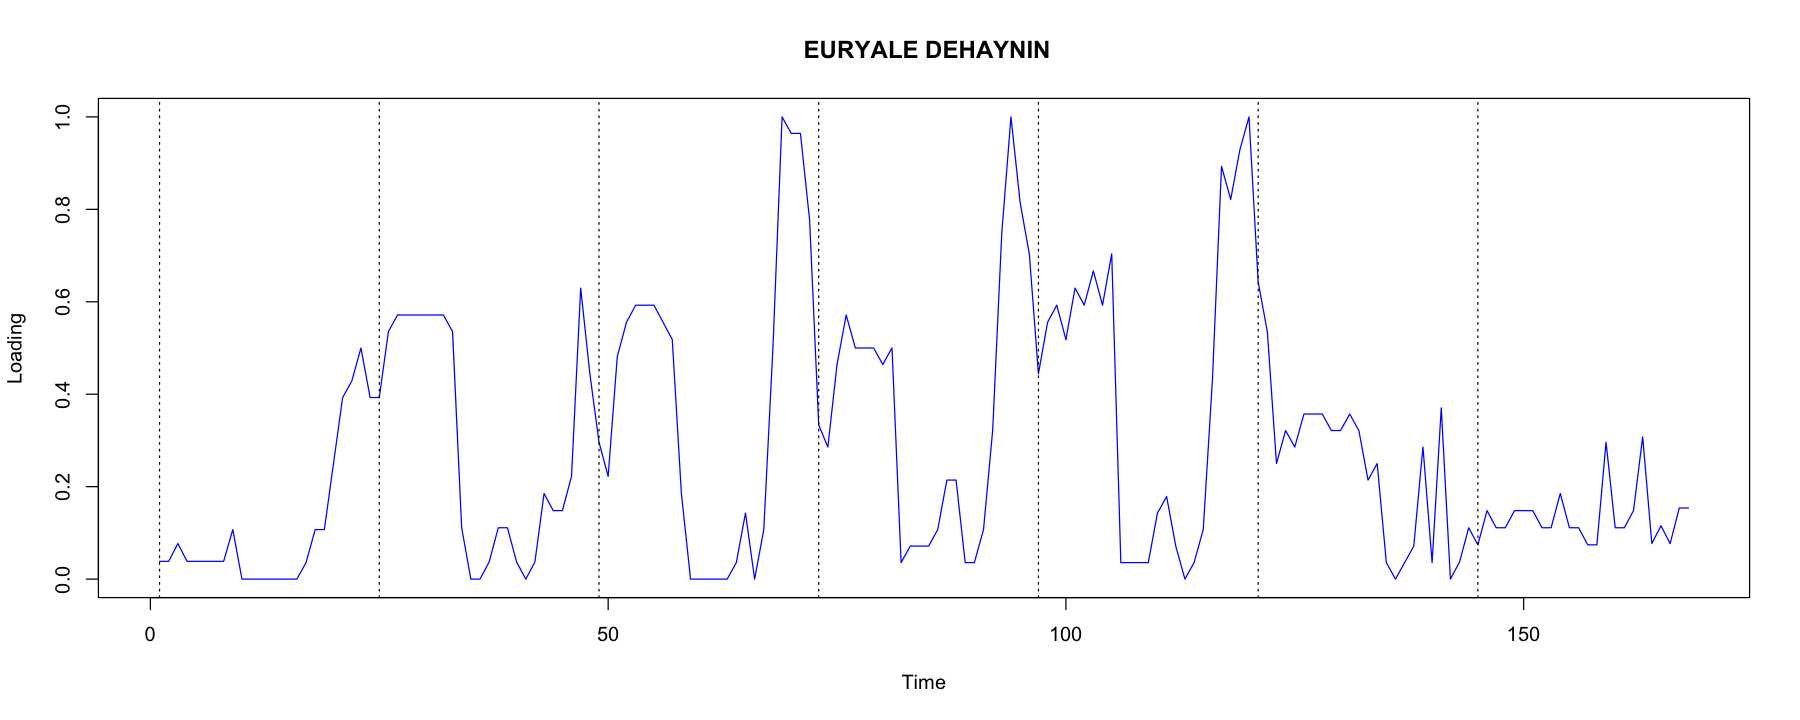

In [36]:
timeTick <- 1 + 24*(0:6)  # vector corresponding to the beginning of days
par(mfrow = c(1, 1))

options(repr.plot.width = 15, repr.plot.height = 6)

plot(x[1, ], col = "blue", type = "l", ylim = c(0, 1), 
     xlab = "Time", ylab = "Loading", main = rownames(x)[1])
abline(v = timeTick, lty = "dotted")


In [37]:
# From now on, we use numbers instead of station names, 
# in order to simplify printing
rownames(x) <- 1:nrow(x)

# Descriptive statistics.

Some ideas : 

1. Draw a matrix of plots of size 4*4, corresponding to the first 16 stations. (Do not forget the vertical lines corresponding to days).
2. Draw the boxplot of the variables, sorted in time order. 
What can you say about the distribution of the variables? 
Position, dispersion, symmetry?
3. Investigate the temporal correlation of the variables. 
For instance, for a given station, plot the loading at t+h versus loading at time t.
Visualize the correlation matrix by an image plot. Interpret the result.
4. Plot the stations coordinates on a 2D map (latitude versus longitude). Use a different color for stations which are located on a hill.
5. Redo questions 1-3 for the subset of stations which are located on a hill. Same questions for those who are not. Comment?

# Principal component analysis

Some ideas :

1. Perform a PCA with package FactoMineR. Should the data be scaled?
2. Plot the percentage of variance explained by the first 15 components, as well as a boxplot of the coordinates of the indivuals on the 15 first principal axis. How many components can be kept?
3. Plot the coordinates of the first 4 principal components on different graphs. Interpret the result (remember that the original variables are time steps).
4. Plot the circle of correlation. Interpret the result.
5. Plot the individuals on the plan spanned by the first two coordinates. Interpret the result.
6. Add the information brought by the variable qualitative variable 'bonus', indicating whether a station is located on a hill or not. In particular, where are located these stations on the graph of individuals? Is it surprising?
7. Implement questions 1-6 in Python. For that, you can have a look at the notebook on MARS, of https://github.com/wikistat/Exploration/

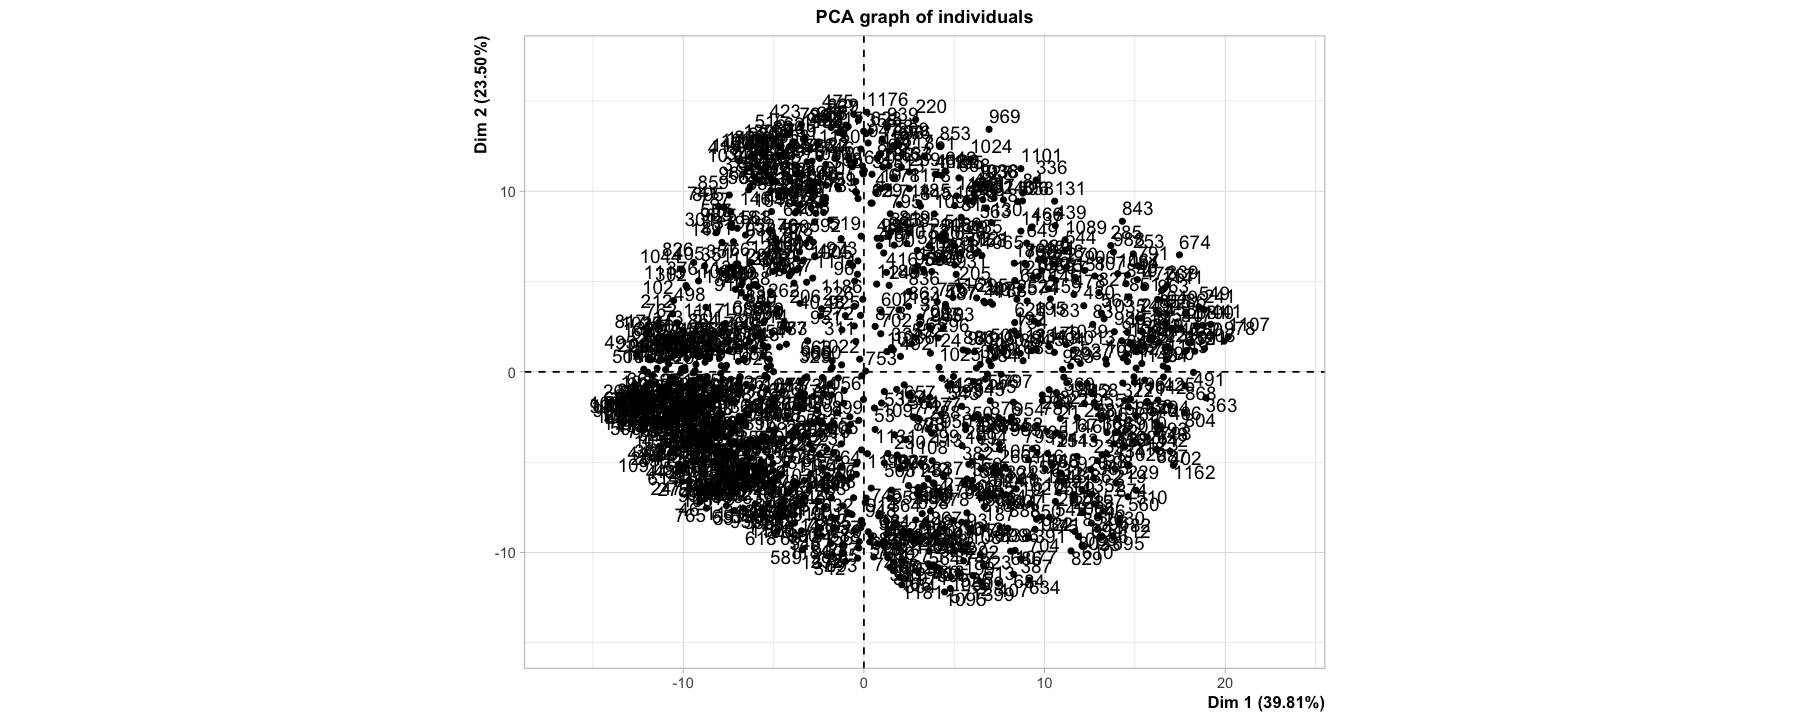

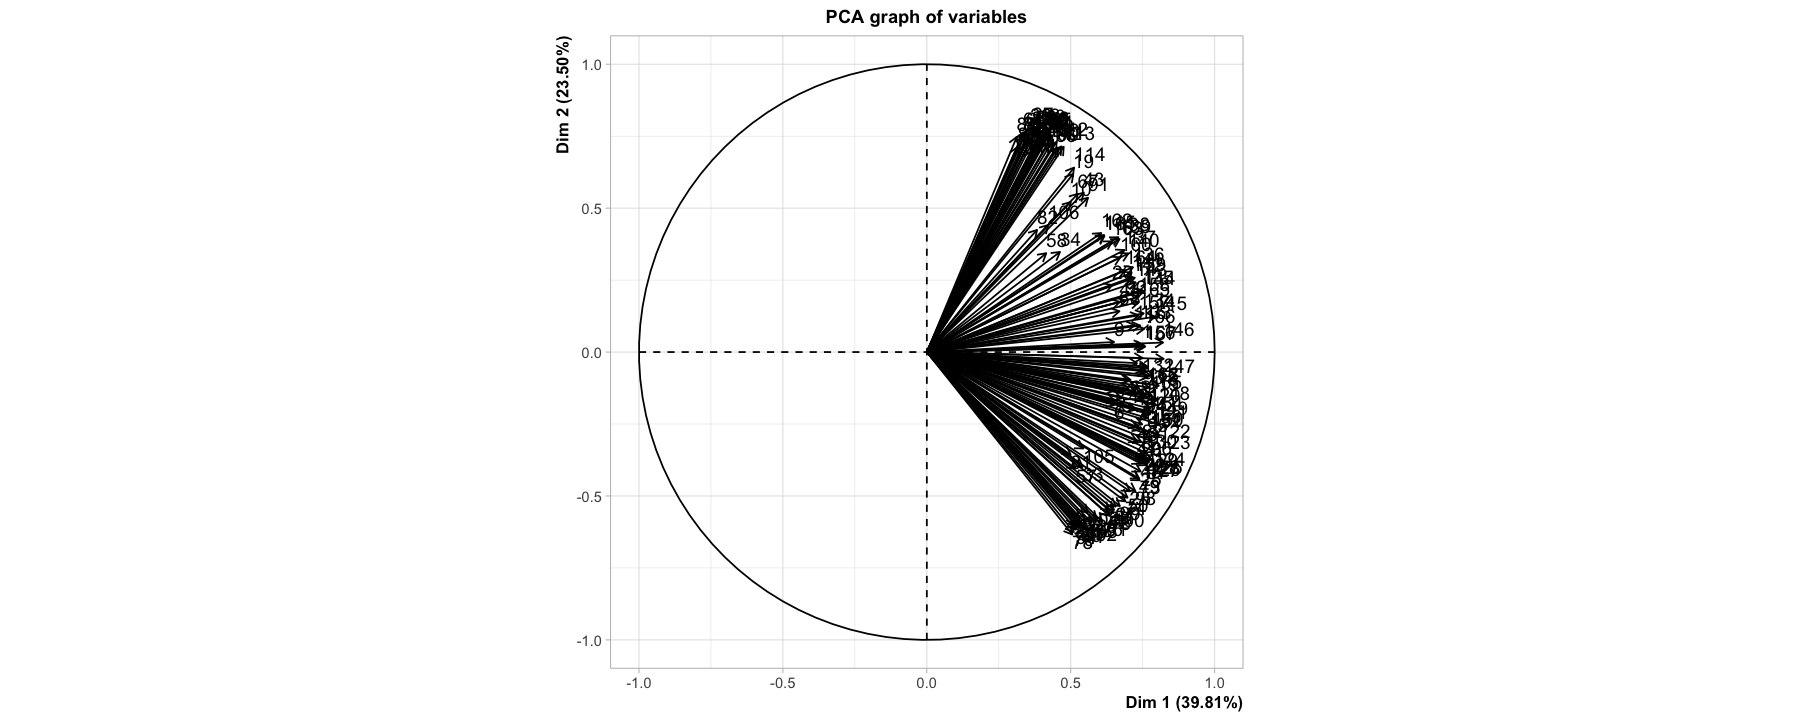

In [38]:
velib.pca <- PCA(x, scale=TRUE, ncp=15)

Data should be scaled, in this case the PCA graph is more legible.

In [39]:
get_eigenvalue(velib.pca)[1:15,]

eigenvalue variance.percent cumulative.variance.percent
Dim.1  66.888963  39.8148588       39.81486                   
Dim.2  39.486446  23.5038371       63.31870                   
Dim.3   8.867649   5.2783627       68.59706                   
Dim.4   7.305326   4.3484080       72.94547                   
Dim.5   5.503113   3.2756624       76.22113                   
Dim.6   3.245742   1.9319894       78.15312                   
Dim.7   2.829095   1.6839854       79.83710                   
Dim.8   2.684309   1.5978028       81.43491                   
Dim.9   2.157416   1.2841760       82.71908                   
Dim.10  2.057260   1.2245596       83.94364                   
Dim.11  1.673183   0.9959422       84.93958                   
Dim.12  1.456974   0.8672462       85.80683                   
Dim.13  1.404226   0.8358487       86.64268                   
Dim.14  1.214552   0.7229479       87.36563                   
Dim.15  1.159584   0.6902283       88.05586

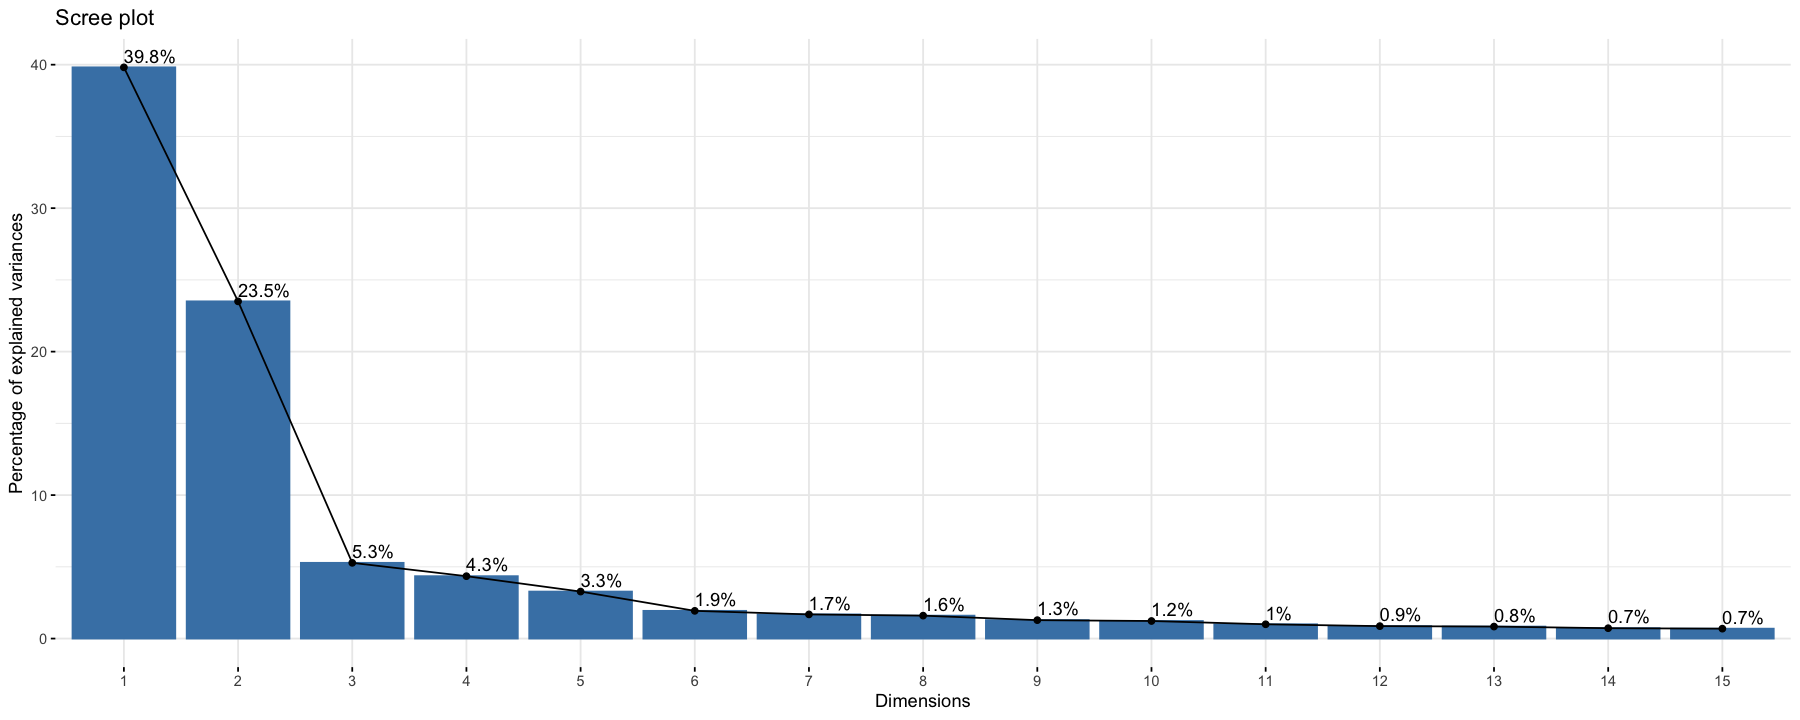

In [40]:
fviz_eig(velib.pca, addlabels = TRUE,ncp=15)

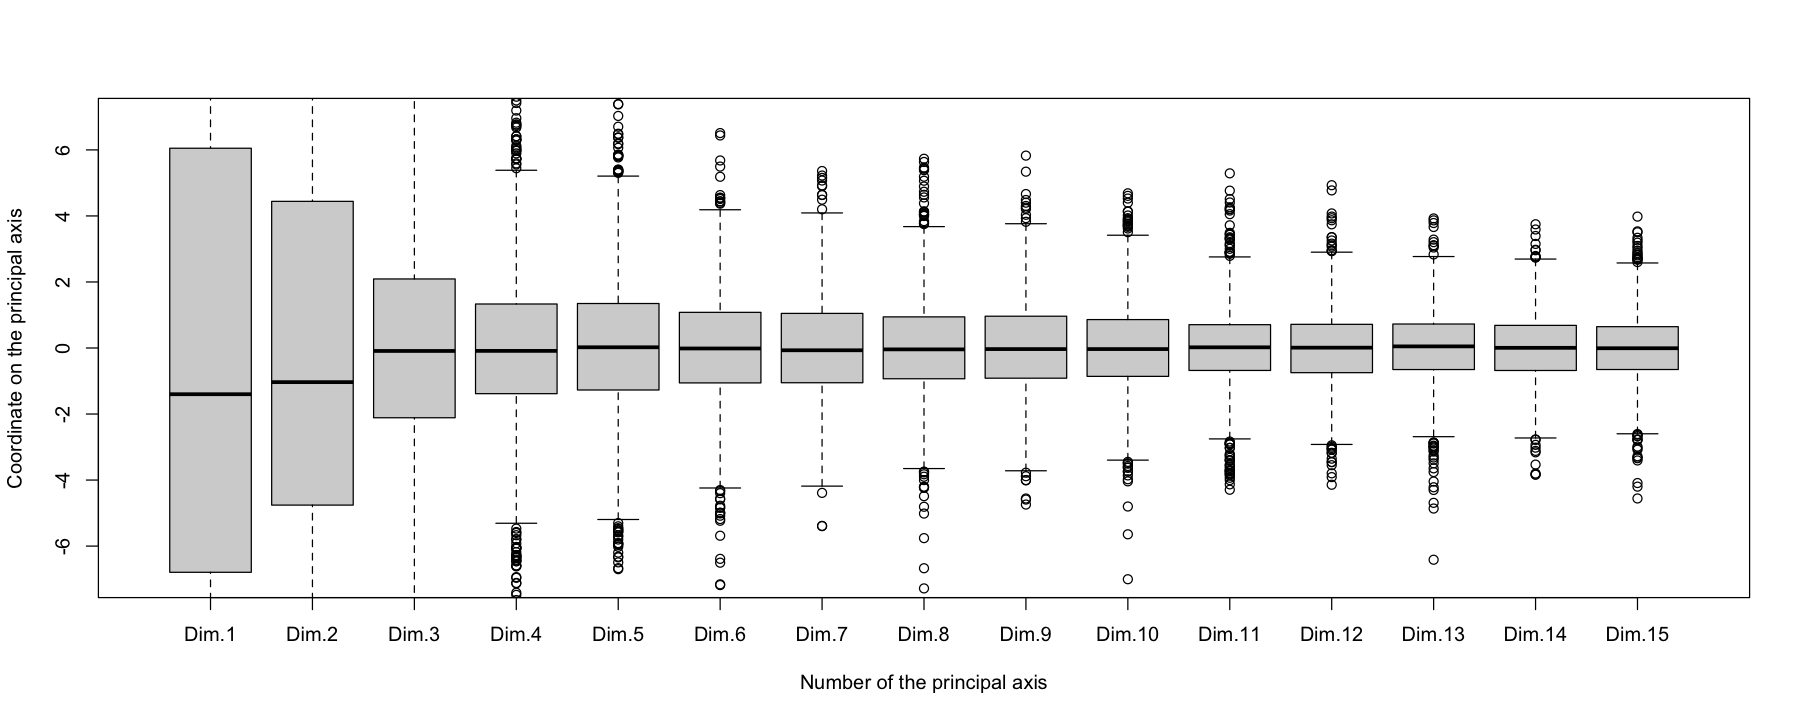

In [41]:
boxplot(velib.pca$ind$coord,ylim=c(-7,7),
        xlab = "Number of the principal axis",
        ylab = "Coordinate on the principal axis")

We keep 5 components.

In [71]:
get_pca_var(velib.pca)$coord[, 1:4]

Dim.1     Dim.2       Dim.3        Dim.4       
1   0.7474314  0.02560724  0.052315543 -0.04483208 
2   0.7301770 -0.03868910  0.125565507 -0.05920623 
3   0.7032035 -0.09966322  0.193984521 -0.07462482 
4   0.7012618 -0.12767592  0.207799074 -0.08728093 
5   0.6779265 -0.16027615  0.247518775 -0.09057839 
6   0.6514566 -0.18397519  0.275369253 -0.08854771 
7   0.6534594 -0.16998014  0.278766436 -0.09376761 
8   0.6553566 -0.13310366  0.279994400 -0.10516275 
9   0.6506419  0.03506509  0.283335250 -0.13918886 
10  0.5002716  0.52152198  0.275455190 -0.18454158 
11  0.3940016  0.74378413  0.260086514 -0.09793554 
12  0.3952422  0.76270022  0.228137954 -0.05816399 
13  0.3916629  0.77898324  0.194589672 -0.02238519 
14  0.4360721  0.75364441  0.139323754  0.02903912 
15  0.4294755  0.76198450  0.129450574  0.05114268 
16  0.4209429  0.76662693  0.128960558  0.06771338 
17  0.4197971  0.76088840  0.105543275  0.08258397 
18  0.4391427  0.73788400  0.073982160  0.10625641 
19  0.5089564  0.61906959 -0.021400249  0.18708318 
20  0.6443955  0.23275375 -0.157306024  0.30398228 
21  0.7322552 -0.12591959 -0.175647896  0.33327996 
22  0.7481293 -0.25112619 -0.137275510  0.32857405 
23  0.7453991 -0.31242906 -0.103410508  0.28699708 
24  0.7544888 -0.36443382 -0.054622651  0.24201341 
25  0.7430195 -0.41503885 -0.007032655  0.18809252 
26  0.7056600 -0.48376494  0.092965431  0.14229885 
27  0.6560618 -0.53678283  0.195358683  0.09541715 
28  0.6341773 -0.55044818  0.229944487  0.08146371 
29  0.5902632 -0.58134879  0.277555350  0.07007072 
30  0.5345836 -0.61054904  0.306083516  0.05918674 
⋮   ⋮         ⋮           ⋮            ⋮           
139 0.6696028  0.39251416 -0.33215891  -0.028512713
140 0.7002510  0.34244473 -0.32928535  -0.031985789
141 0.7116930  0.27497231 -0.32564715  -0.058301990
142 0.7135276  0.26015305 -0.33682234  -0.010661126
143 0.7255175  0.24214009 -0.33548179   0.005313457
144 0.7542727  0.21177455 -0.32189319  -0.048251809
145 0.7941135  0.12310152 -0.27940766  -0.112765272
146 0.8207673  0.03324944 -0.21985726  -0.187023413
147 0.8229067 -0.02351891 -0.16544290  -0.276422536
148 0.8060580 -0.11675511 -0.12396690  -0.356271090
149 0.7977353 -0.16855871 -0.11208141  -0.396337490
150 0.7829093 -0.20939872 -0.09867317  -0.416793936
151 0.7760841 -0.21648024 -0.09728644  -0.423355462
152 0.7764274 -0.20980837 -0.10123866  -0.425130066
153 0.7758876 -0.19637357 -0.10454993  -0.431465550
154 0.7817588 -0.15091249 -0.12542133  -0.438545743
155 0.7778226 -0.08105060 -0.14391133  -0.447691238
156 0.7557461  0.02273997 -0.17571375  -0.432285555
157 0.7361564  0.12764559 -0.19497011  -0.406780813
158 0.7364596  0.19170437 -0.22744404  -0.351017623
159 0.7225538  0.25836714 -0.24545599  -0.300538437
160 0.6723324  0.32912791 -0.26741954  -0.272233893
161 0.6171123  0.40303484 -0.25519963  -0.199948155
162 0.6062590  0.41349235 -0.25094139  -0.176915806
163 0.6441895  0.38476298 -0.24218373  -0.158967523
164 0.6886700  0.28456641 -0.20773895  -0.160753046
165 0.7366135  0.17373279 -0.16341644  -0.172403175
166 0.7551844  0.08069746 -0.13656975  -0.148022049
167 0.7587382  0.01886661 -0.11995016  -0.158070443
168 0.7663772 -0.04992968 -0.08105141  -0.190215851

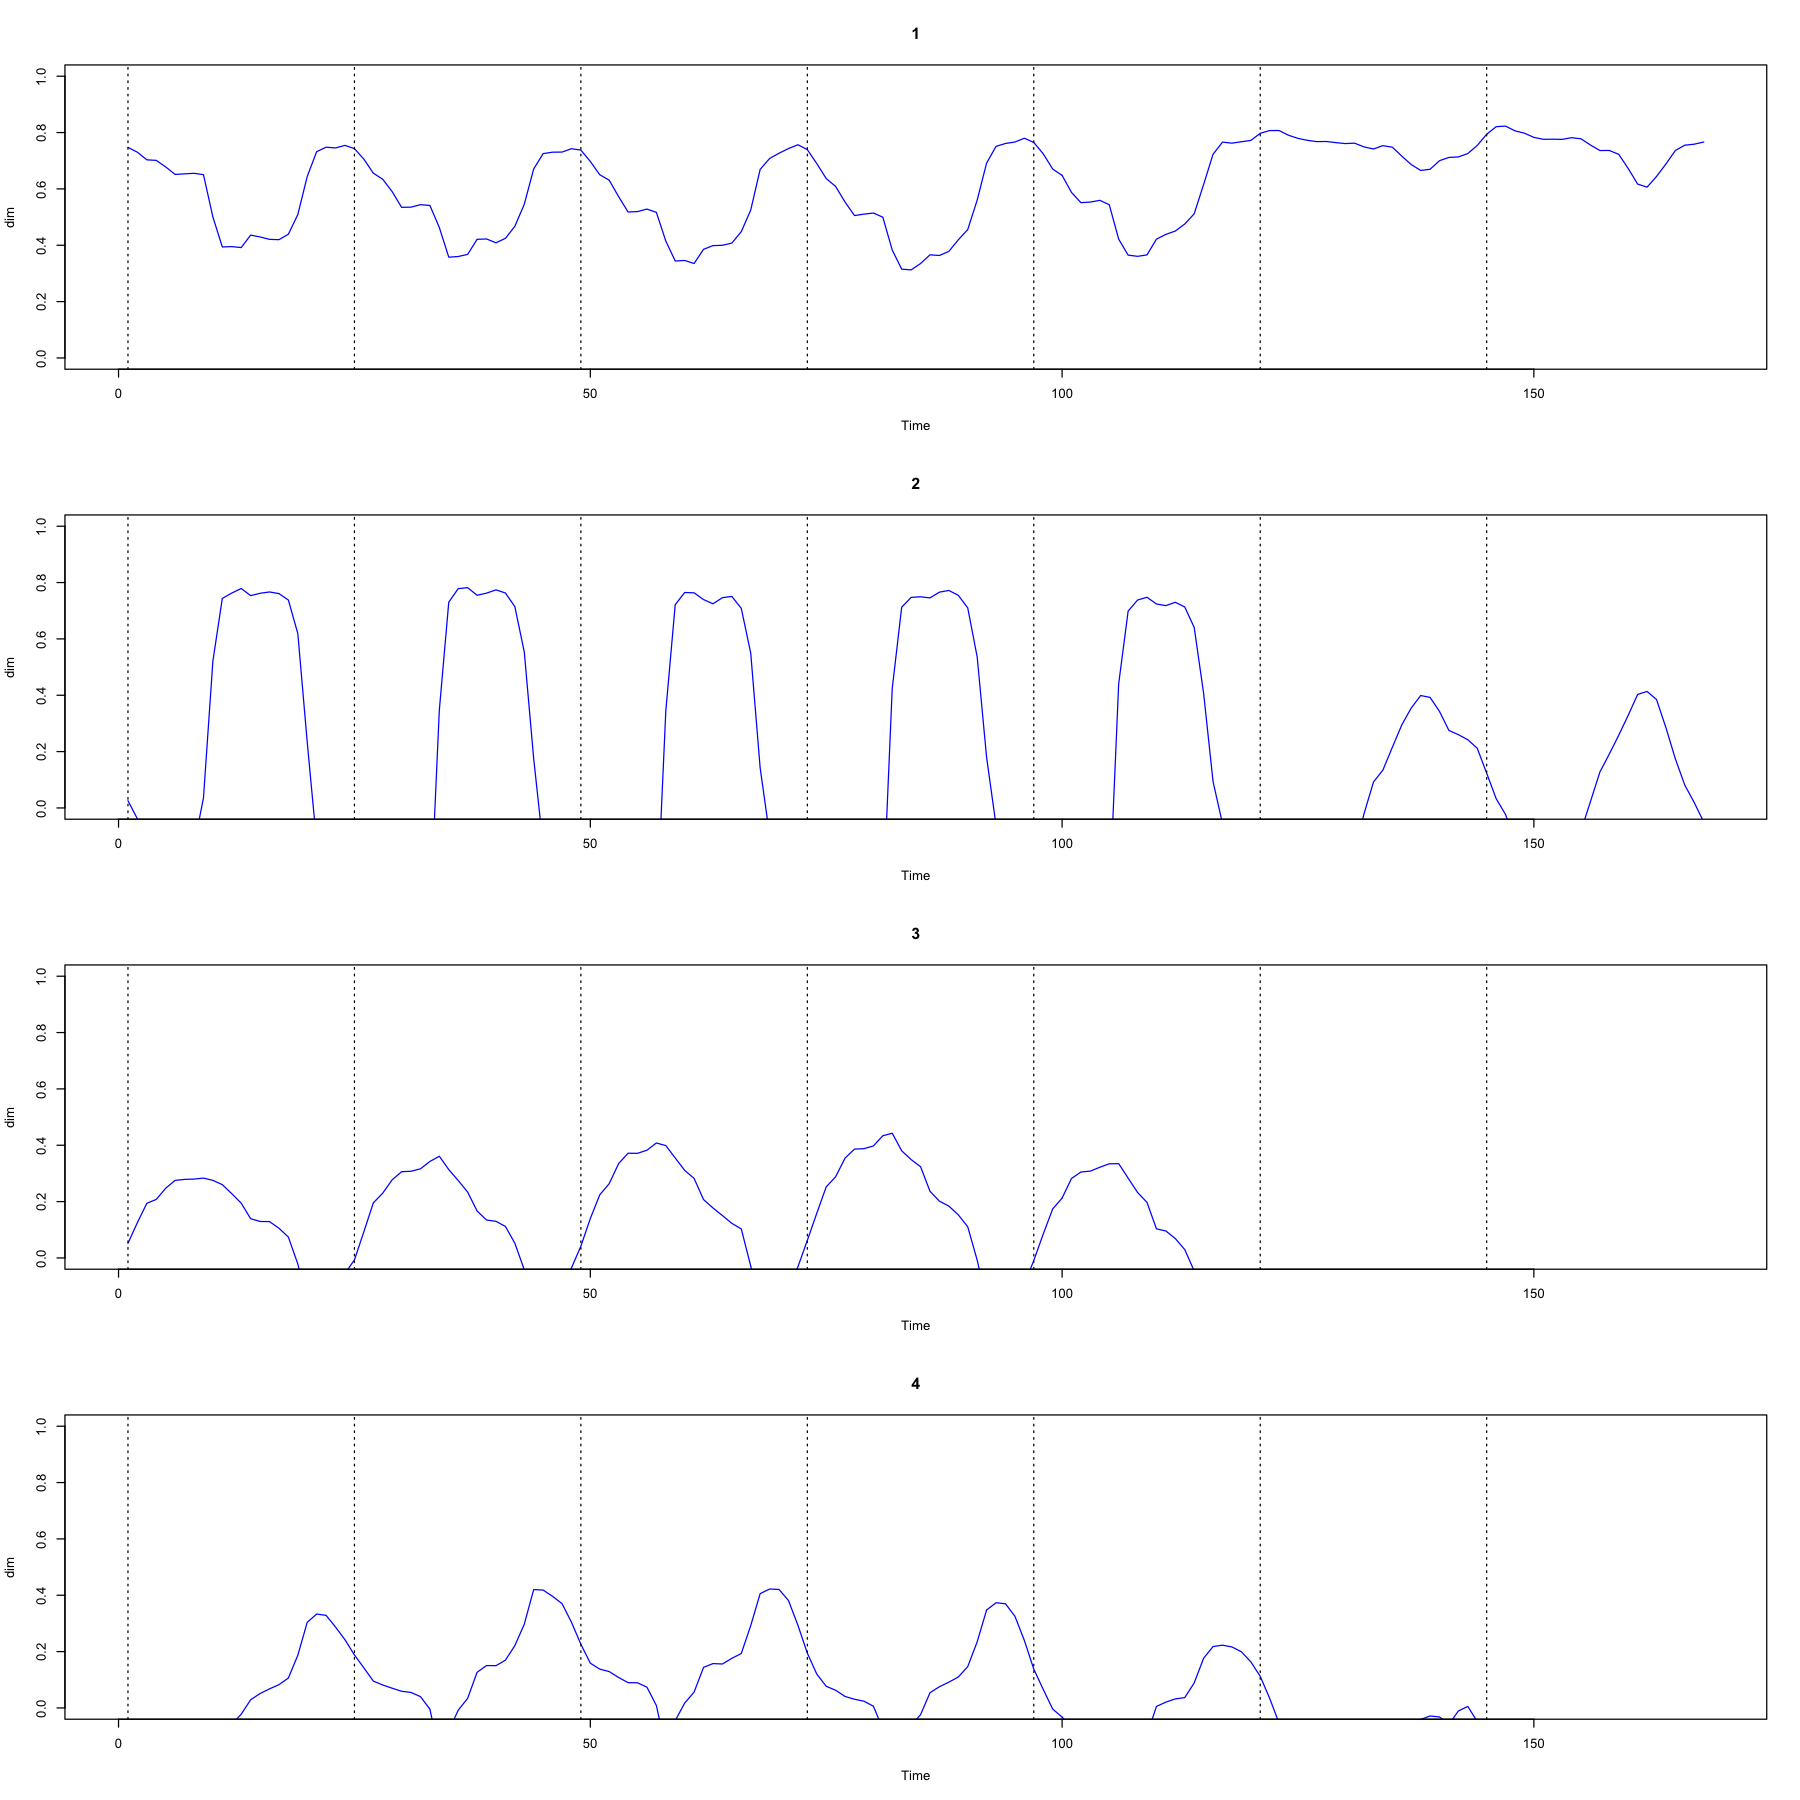

In [54]:
dim = get_pca_var(velib.pca)$coord
options(repr.plot.width = 15, repr.plot.height = 15)
par(mfrow=c(4,1))
for (i in 1:4){
    plot(dim[,i], col = "blue", type = "l", ylim = c(0, 1), 
     xlab = "Time", ylab = "dim", main = rownames(x)[i])
    abline(v = timeTick, lty = "dotted")
}


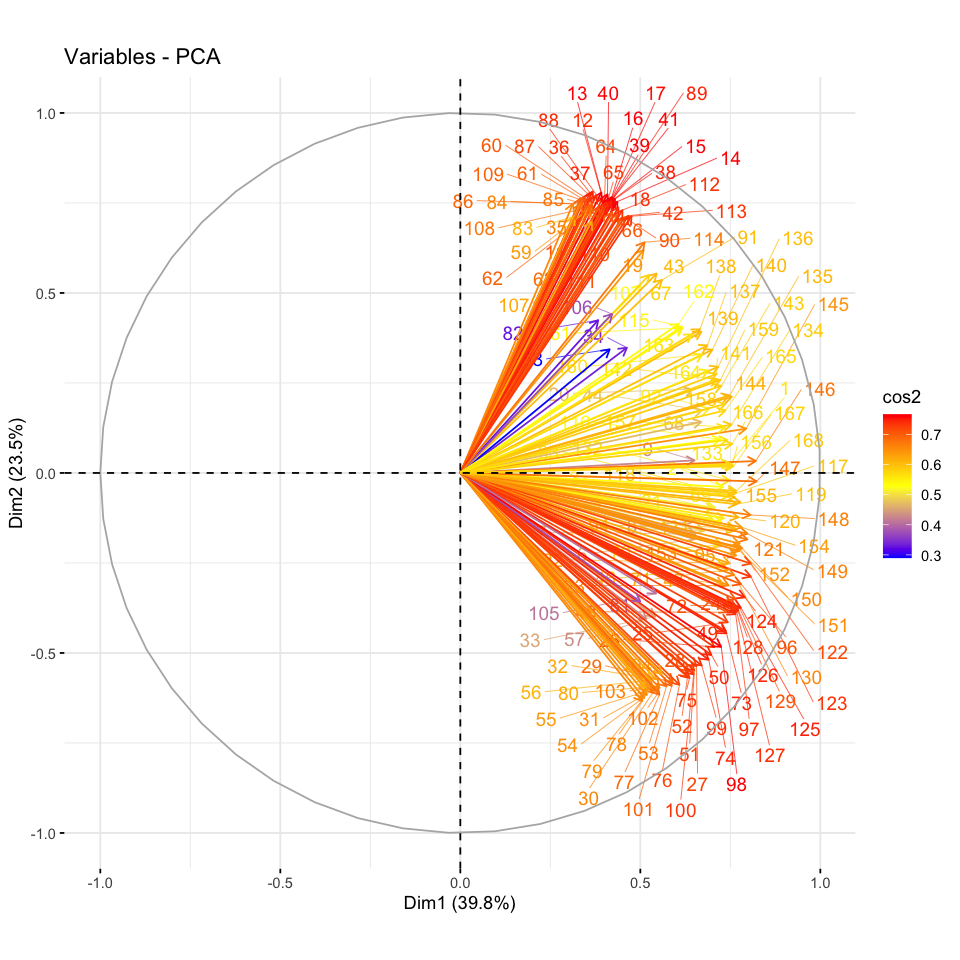

In [73]:
fviz_pca_var(velib.pca,axes=c(1,2), col.var = "cos2",
            gradient.cols = c("blue","yellow","red"),
            repel = TRUE)


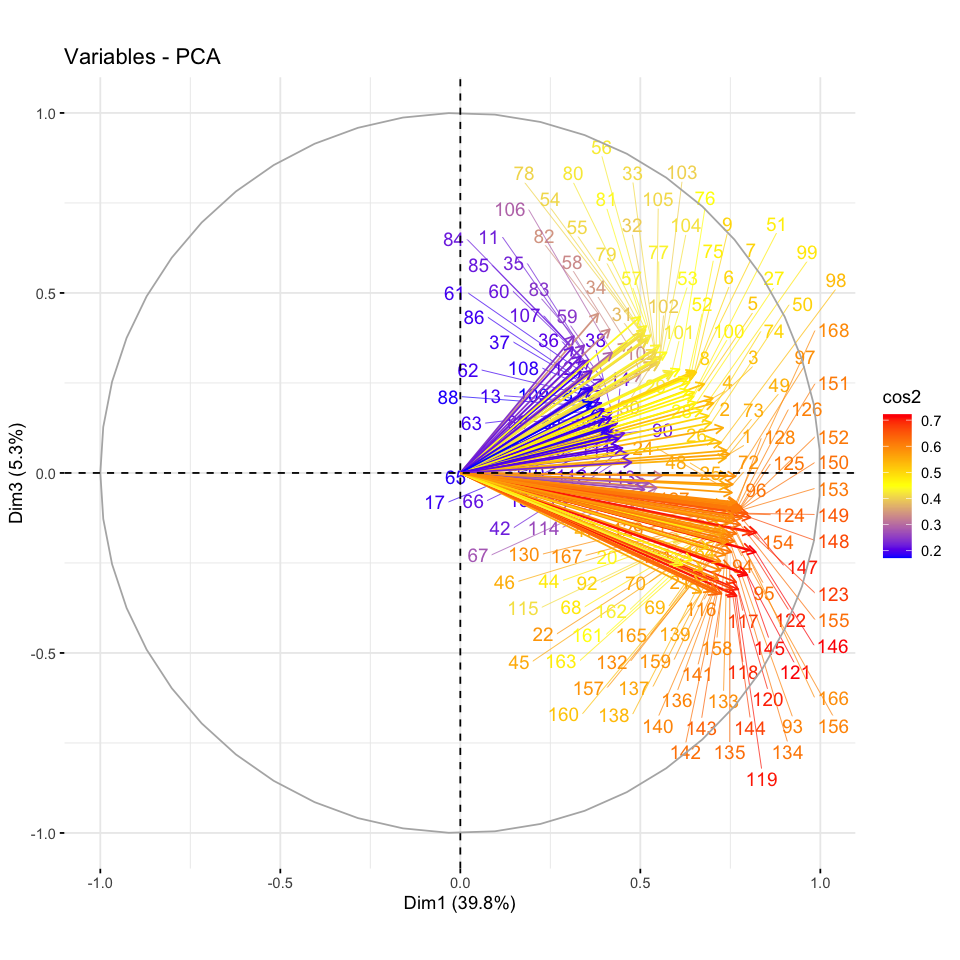

In [75]:
fviz_pca_var(velib.pca,axes=c(1,3), col.var = "cos2",
            gradient.cols = c("blue","yellow","red"),
            repel = TRUE)

Les heures correspondant aux flèches bleues sont principalement les nuits du week-end (0-3h), les flèches jaunes, qui se trouvent dans la même région que les flèches bleues mais plus longues, sont l'après-midi du jour de la semaine (13-17h), et les flèches rouges sous l'axe horizontal est principalement les matins du jour de la semaine (4-5h).

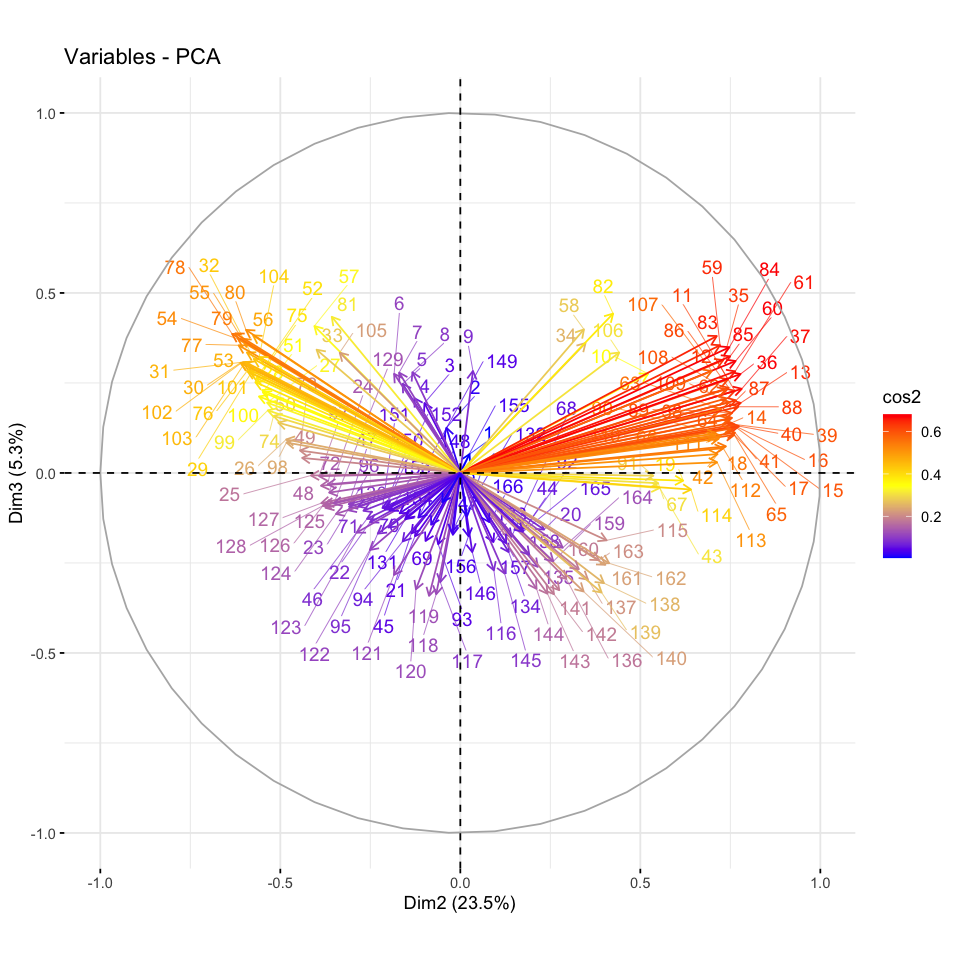

In [78]:
fviz_pca_var(velib.pca,axes=c(2,3), col.var = "cos2",
            gradient.cols = c("blue","yellow","red"),
            repel = TRUE)

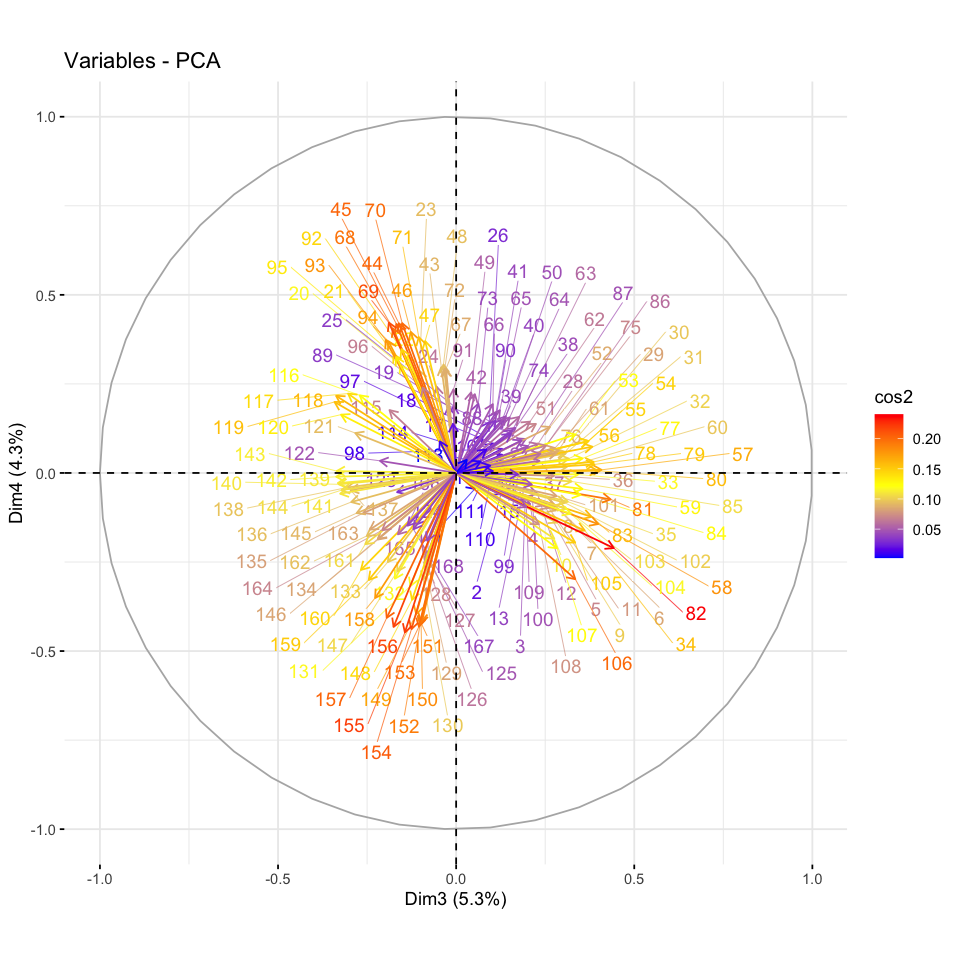

In [79]:
fviz_pca_var(velib.pca,axes=c(3,4), col.var = "cos2",
            gradient.cols = c("blue","yellow","red"),
            repel = TRUE)

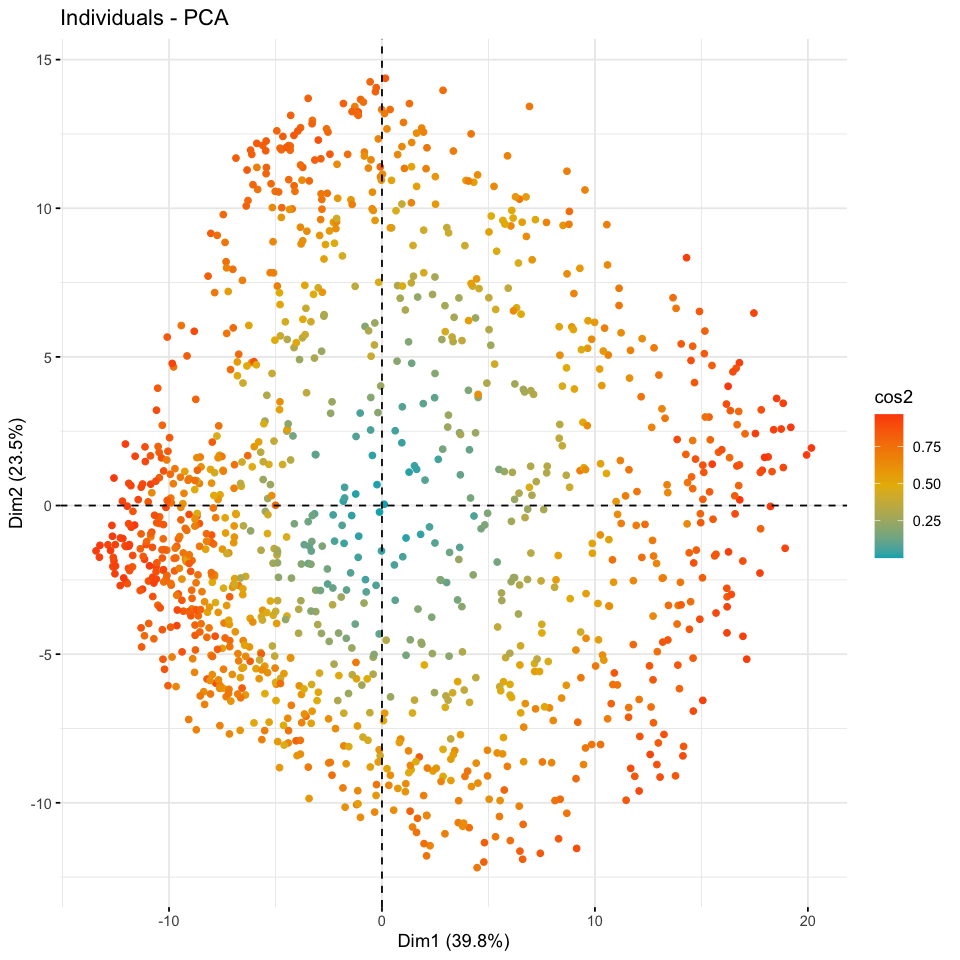

In [87]:
options(repr.plot.width = 8, repr.plot.height = 8)
fviz_pca_ind(velib.pca,geom="point",
             col.ind = "cos2", # Colorer par le cos2
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = FALSE)

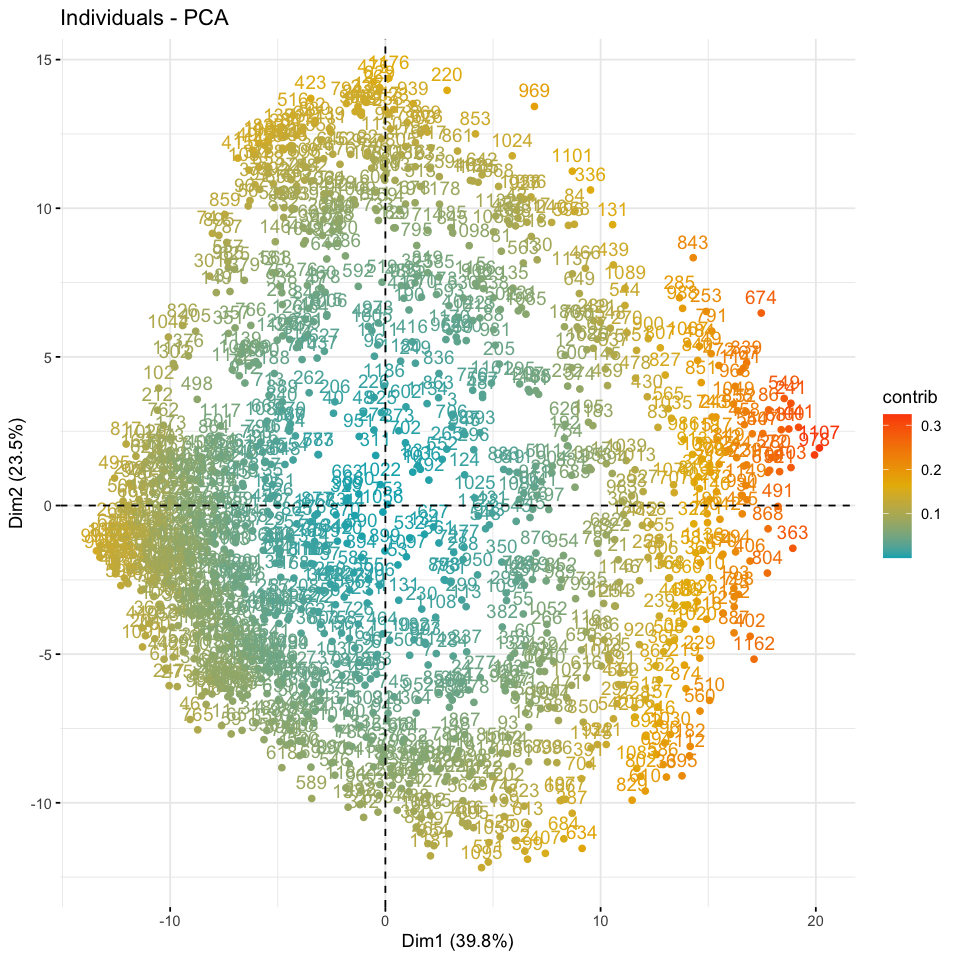

In [69]:
options(repr.plot.width = 8, repr.plot.height = 8)
fviz_pca_ind(velib.pca,col.ind = "contrib", 
             gradient.cols = c("#00AFBB","#E7B800","#FC4E07"),repel = FALSE)

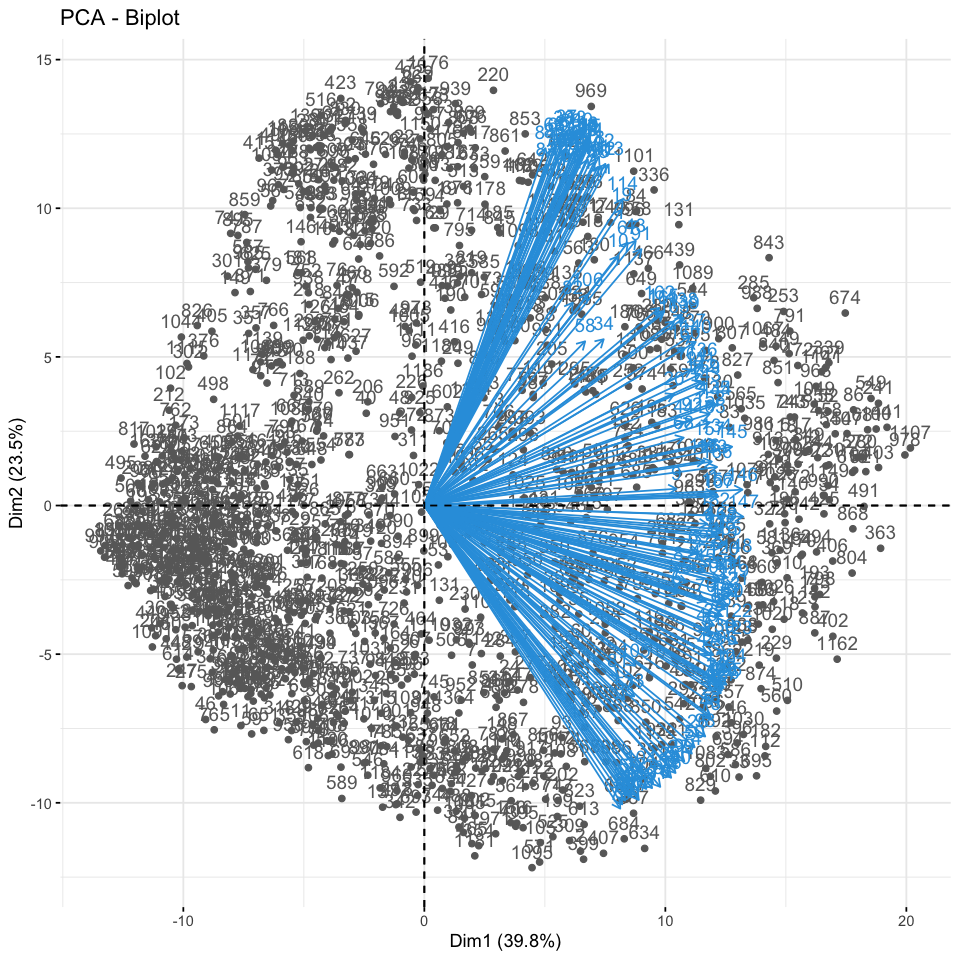

In [70]:
fviz_pca_biplot(velib.pca, repel = FALSE,
                col.var = "#2E9FDF",
                col.ind = "#696969")

In [88]:
options(repr.plot.width = 8, repr.plot.height = 8)
fviz_pca_ind(velib.pca,
             habillage=velib$bonus, repel = FALSE)

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“production de NaN”
Warn

ERROR while rich displaying an object: Error: Continuous value supplied to discrete scale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(cap

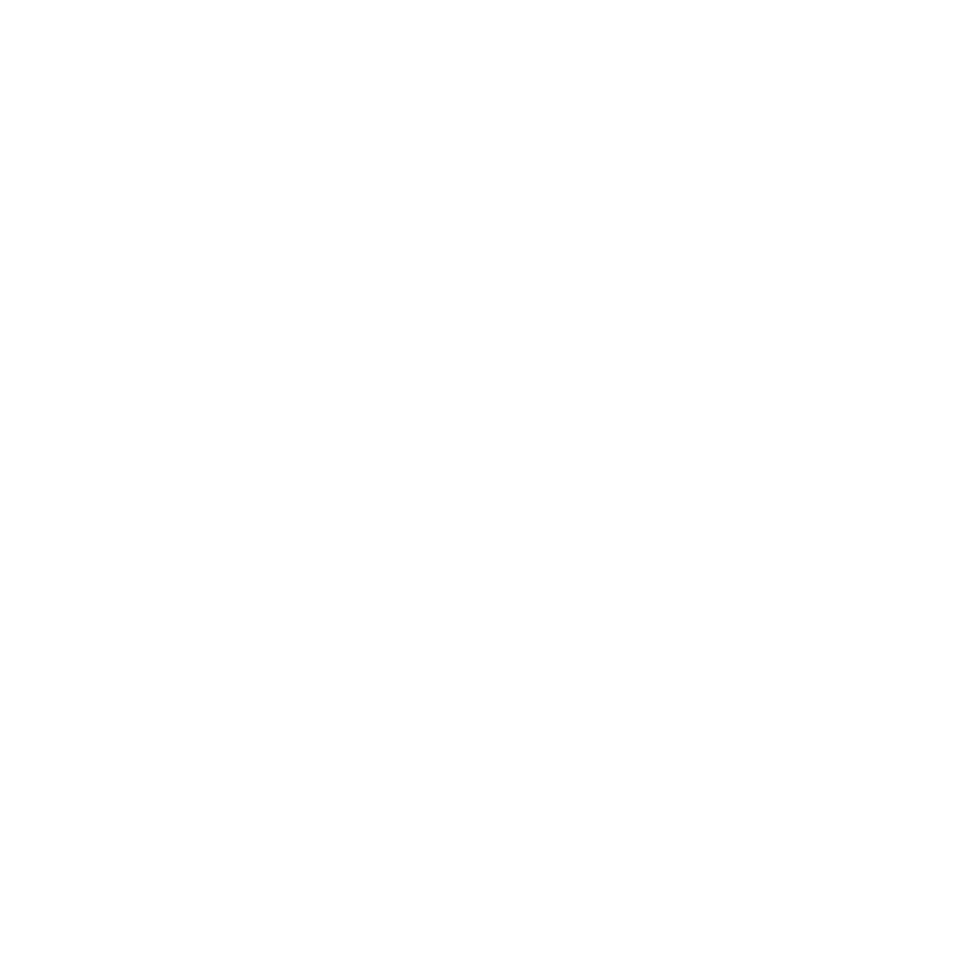

In [106]:
fviz_pca_ind(velib.pca, label="none", col.ind = velib$bonus,
             palette = c("#00AFBB", "#E7B800"),
             addEllipses = TRUE)

In [103]:
velib$bonus

[1] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  [38] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 [112] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 [149] 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0
 [445] 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 [482] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 [519] 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 [556] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 [778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 [889] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 [926] 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 [963] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0
[1000] 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
[1037] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
[1074] 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
[1111] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
[1148] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1185] 0 0 1 0 0